# INF391 - Tarea 5

Utilizar Mean-shift para segmentar 3 imágenes a elección. Analizar cómo influye la variedad de colores y formas en la segmentación.

In [1]:
import numpy as np    
import cv2    
from sklearn.cluster import MeanShift, estimate_bandwidth
from matplotlib import pyplot as plt

In [2]:
def segmentador(img_str):
    #Loading original image
    originImg = cv2.imread(img_str)

    # Shape of original image    
    originShape = originImg.shape

    # Converting image into array of dimension [nb of pixels in originImage, 3]
    # based on r g b intensities    
    flatImg = np.reshape(originImg, [-1, 3])
    
    # Estimate bandwidth for meanshift algorithm    
    b = estimate_bandwidth(flatImg, quantile=0.1, n_samples=100)
    
    ms = MeanShift(b, bin_seeding=True)

    # Performing meanshift on flatImg    
    ms.fit(flatImg)
    
    # (r,g,b) vectors corresponding to the different clusters after meanshift    
    labels = ms.labels_

    # Remaining colors after meanshift    
    cluster_centers = ms.cluster_centers_    

    # Finding and diplaying the number of clusters    
    labels_unique = np.unique(labels)    
    n_clusters_ = len(labels_unique)
    
    originImg = cv2.cvtColor(originImg, cv2.COLOR_BGR2RGB)
    segmentedImg = cluster_centers[np.reshape(labels, originShape[:2])]
    segmentedImg = cv2.cvtColor((segmentedImg).astype(np.uint8), cv2.COLOR_BGR2RGB)
    
    return (originImg, segmentedImg, n_clusters_, b)

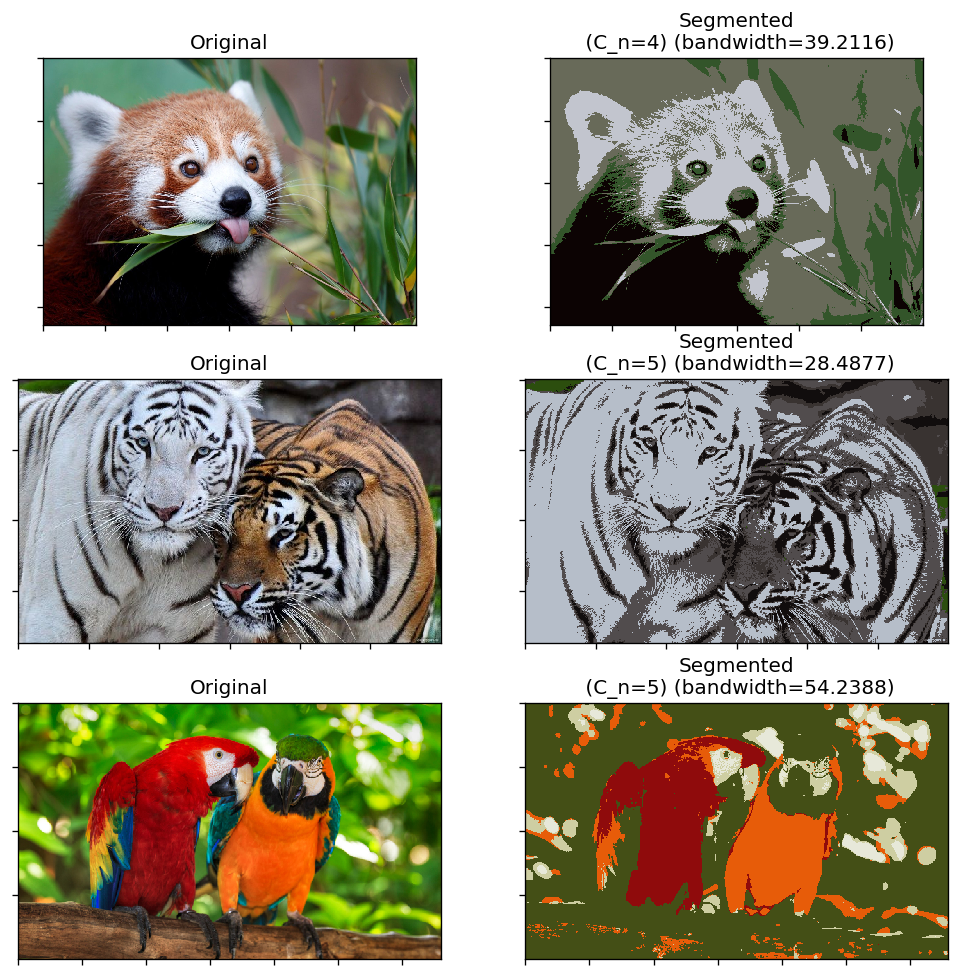

In [3]:
fig, axs = plt.subplots(3,2, figsize=(10,10), dpi=120)

for i in range(0,3):
    img_o, img_seg, c_n, b_n = segmentador('img_%d.jpg' % (i+1))
    axs[i, 0].imshow(img_o)
    axs[i, 0].set_title('Original')
    axs[i, 0].set_yticklabels([])
    axs[i, 0].set_xticklabels([])

    axs[i, 1].imshow(img_seg)
    axs[i, 1].set_title('Segmented\n (C_n=%d) (bandwidth=%.4f)' % (c_n,b_n))
    axs[i, 1].set_yticklabels([])
    axs[i, 1].set_xticklabels([])

plt.show() 

# Análisis

La seleccción de las imágenes utilizadas fue de acuerdo a la cantidad de colores que presentaban a simple vista. Además, se considero el calculo estimado del bandwidth por medio de la función dada en el enunciado.

Primero debemos considerar que Mean-shift hace uso de un KDE o Kernel Density Estimation, el cual estima la función de distribución de probabilidad subyacente a un conjunto de datos. Por otro lado, dado un kernel $K$ y un bandwidth $h$,  se define una funcion de kernel como:
$$
f_{K}(u) = \frac{1}{nh^{d}}\sum_{i=1}^{n}K(\frac{u-u_{i}}{h})
$$
Donde $u$ es un punto de un data set de dimensionalidad $d$.

A primera vista, se podría pensar que una imagen con una cantidad de colores limitada y poco distribuidos, tendería a tener un bajo nivel de clusterización, dado que no existe una dispersión en los datos; generando una función de distribución de probabilidad pobre.

Luego, bajo la consideración de un kernel gausiano, podemos generar una hipótesis en base a que: _la evaluación $K(\frac{u-u_{i}}{h})$ para bandwidths muy alto nos generará una mayor cantidad de clusters, debido a la evaluación de este termino en el kernel_.

Para verificar o refutar esto, analicemos las segmentaciones de las imágenes:
* La primera imagen del Panda Rojo, posee una cantidad baja de colores además de tener tonos mucho más oscuros. La cantidad de clusters obtenidos fue de 4 para un bandwidth de $39.2116$.
* En el caso de la segunda imagen con los Tigres de Bengala, se juega con el overlapping de dos objetos distintivos, un tigre café versus uno blanco, además de un pequeño fondo gris, y las respectivas rayas negras de los animales. Esta combinación de elementos generó una cantidad de 5 cluster , para un bandwidth de $28.4877$.
* La tercera imagen con los guacamayos tiene una alta cantidad de colores, sin embargo, muchos de ellos se presentan en pequeñas porciones (como los colores de las alas de las aves o sus cabezas). Esta imagen obtuvo una cantidad de 5 clusters, para un bandwidth de $54.2388$.


En base a estos datos, podemos refutar la hipótesis planteada anteriormente, dado que en la imagen uno se obtuvo un mayor bandwidth con respecto a la imagen dos, sin embargo, la primera generó menos clusters que la segunda. Por otro lado, la tercera imagen obtuvo el mayor bandwidth de las tres segmentaciones, pero generó la misma cantidad de clusters que la segunda imagen. Por lo tanto, la cantidad de colores y su distribución en la imagen, sí influyen en la cantidad de clusters que se generan, no así el bandwidth.